# Import Library

In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 42
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
import pickle
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add, Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import  Model, Sequential 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import csv
import requests
from io import StringIO

In [2]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Dataset

In [3]:
df = pd.read_csv("data/review.csv")

In [4]:
df.head().T

,0,1,2,3,4
appVersion,5.16.0,5.16.0,5.16.0,5.16.0,5.15.1
at,2025-04-03 11:08:22,2025-04-04 08:46:42,2025-03-30 10:33:31,2025-03-30 14:35:46,2025-03-25 09:03:05
content,Limit paylater traveloka hanya sekedar gimic /...,tidak ada screening untuk tempat tempat yg dis...,"Aplikasi bagus, namun terkadang tidak jujur, s...",homestay yang kamarnya sudah habis tetap ada d...,semurah apapun promonya saya tidak akan pernah...
repliedAt,2025-03-30 18:53:54,2025-04-04 09:17:03,2025-03-30 05:13:09,2025-03-30 15:27:28,2025-01-02 21:22:19
replyContent,"Hai Reza, mohon maaf atas ketidaknyamanannya. ...","Hai Nina, mohon maaf atas kendala yang Anda al...","Hai Ardianto, terima kasih atas masukan Anda m...","Hai Anggraeni, mohon maaf atas kendala yang An...","Hai Deni, mohon maaf atas ketidaknyamanan Anda..."
reviewCreatedVersion,5.16.0,5.16.0,5.16.0,5.16.0,5.15.1
reviewId,0725c399-b5a3-485c-b916-f4d87e932510,f5fb97be-08d0-47fe-8420-94f2d85d1e1d,8408ca37-2b90-4c21-8327-7c651654ee1e,7937d32a-7f53-4f06-85d2-afcc15f1c8d0,b8143b57-efb5-4a18-8032-263e8bb76d43
score,1,1,1,1,1
thumbsUpCount,10,1,14,6,29
userImage,https://play-lh.googleusercontent.com/a-/ALV-U...,https://play-lh.googleusercontent.com/a-/ALV-U...,https://play-lh.googleusercontent.com/a/ACg8oc...,https://play-lh.googleusercontent.com/a-/ALV-U...,https://play-lh.googleusercontent.com/a/ACg8oc...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   appVersion            24826 non-null  object
 1   at                    30000 non-null  object
 2   content               30000 non-null  object
 3   repliedAt             19002 non-null  object
 4   replyContent          18998 non-null  object
 5   reviewCreatedVersion  24826 non-null  object
 6   reviewId              30000 non-null  object
 7   score                 30000 non-null  int64 
 8   thumbsUpCount         30000 non-null  int64 
 9   userImage             30000 non-null  object
 10  userName              30000 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


# Data Preprocessing

### (Check & Fix) Missing valuse & Duplicated data 

In [6]:
df.isnull().sum()

appVersion               5174
at                          0
content                     0
repliedAt               10998
replyContent            11002
reviewCreatedVersion     5174
reviewId                    0
score                       0
thumbsUpCount               0
userImage                   0
userName                    0
dtype: int64

In [7]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}" )
print(f"jumlah missing values: {df.isnull().sum().sum()}")

Jumlah data duplikat: 0
jumlah missing values: 32348


In [8]:
df.loc[:, 'appVersion'] = df['appVersion'].fillna(df['appVersion'].mode()[0])
df.loc[:, 'reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna(df['reviewCreatedVersion'].mode()[0])
df.loc[:, 'replyContent'] = df['replyContent'].fillna(df['replyContent'].mode()[0])
df.loc[:, 'repliedAt'] = df['repliedAt'].fillna(df['repliedAt'].mode()[0])

In [9]:
df.isnull().sum()

appVersion              0
at                      0
content                 0
repliedAt               0
replyContent            0
reviewCreatedVersion    0
reviewId                0
score                   0
thumbsUpCount           0
userImage               0
userName                0
dtype: int64

In [10]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}" )
print(f"jumlah missing values: {df.isnull().sum().sum()}")

Jumlah data duplikat: 0
jumlah missing values: 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   appVersion            30000 non-null  object
 1   at                    30000 non-null  object
 2   content               30000 non-null  object
 3   repliedAt             30000 non-null  object
 4   replyContent          30000 non-null  object
 5   reviewCreatedVersion  30000 non-null  object
 6   reviewId              30000 non-null  object
 7   score                 30000 non-null  int64 
 8   thumbsUpCount         30000 non-null  int64 
 9   userImage             30000 non-null  object
 10  userName              30000 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


### Cleaning Content

In [12]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [13]:
slangwords = {"bagu": "bagus","@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [14]:
df.head().T

,0,1,2,3,4
appVersion,5.16.0,5.16.0,5.16.0,5.16.0,5.15.1
at,2025-04-03 11:08:22,2025-04-04 08:46:42,2025-03-30 10:33:31,2025-03-30 14:35:46,2025-03-25 09:03:05
content,Limit paylater traveloka hanya sekedar gimic /...,tidak ada screening untuk tempat tempat yg dis...,"Aplikasi bagus, namun terkadang tidak jujur, s...",homestay yang kamarnya sudah habis tetap ada d...,semurah apapun promonya saya tidak akan pernah...
repliedAt,2025-03-30 18:53:54,2025-04-04 09:17:03,2025-03-30 05:13:09,2025-03-30 15:27:28,2025-01-02 21:22:19
replyContent,"Hai Reza, mohon maaf atas ketidaknyamanannya. ...","Hai Nina, mohon maaf atas kendala yang Anda al...","Hai Ardianto, terima kasih atas masukan Anda m...","Hai Anggraeni, mohon maaf atas kendala yang An...","Hai Deni, mohon maaf atas ketidaknyamanan Anda..."
reviewCreatedVersion,5.16.0,5.16.0,5.16.0,5.16.0,5.15.1
reviewId,0725c399-b5a3-485c-b916-f4d87e932510,f5fb97be-08d0-47fe-8420-94f2d85d1e1d,8408ca37-2b90-4c21-8327-7c651654ee1e,7937d32a-7f53-4f06-85d2-afcc15f1c8d0,b8143b57-efb5-4a18-8032-263e8bb76d43
score,1,1,1,1,1
thumbsUpCount,10,1,14,6,29
userImage,https://play-lh.googleusercontent.com/a-/ALV-U...,https://play-lh.googleusercontent.com/a-/ALV-U...,https://play-lh.googleusercontent.com/a/ACg8oc...,https://play-lh.googleusercontent.com/a-/ALV-U...,https://play-lh.googleusercontent.com/a/ACg8oc...


In [15]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [16]:
df.head().T

,0,1,2,3,4
appVersion,5.16.0,5.16.0,5.16.0,5.16.0,5.15.1
at,2025-04-03 11:08:22,2025-04-04 08:46:42,2025-03-30 10:33:31,2025-03-30 14:35:46,2025-03-25 09:03:05
content,Limit paylater traveloka hanya sekedar gimic /...,tidak ada screening untuk tempat tempat yg dis...,"Aplikasi bagus, namun terkadang tidak jujur, s...",homestay yang kamarnya sudah habis tetap ada d...,semurah apapun promonya saya tidak akan pernah...
repliedAt,2025-03-30 18:53:54,2025-04-04 09:17:03,2025-03-30 05:13:09,2025-03-30 15:27:28,2025-01-02 21:22:19
replyContent,"Hai Reza, mohon maaf atas ketidaknyamanannya. ...","Hai Nina, mohon maaf atas kendala yang Anda al...","Hai Ardianto, terima kasih atas masukan Anda m...","Hai Anggraeni, mohon maaf atas kendala yang An...","Hai Deni, mohon maaf atas ketidaknyamanan Anda..."
reviewCreatedVersion,5.16.0,5.16.0,5.16.0,5.16.0,5.15.1
reviewId,0725c399-b5a3-485c-b916-f4d87e932510,f5fb97be-08d0-47fe-8420-94f2d85d1e1d,8408ca37-2b90-4c21-8327-7c651654ee1e,7937d32a-7f53-4f06-85d2-afcc15f1c8d0,b8143b57-efb5-4a18-8032-263e8bb76d43
score,1,1,1,1,1
thumbsUpCount,10,1,14,6,29
userImage,https://play-lh.googleusercontent.com/a-/ALV-U...,https://play-lh.googleusercontent.com/a-/ALV-U...,https://play-lh.googleusercontent.com/a/ACg8oc...,https://play-lh.googleusercontent.com/a-/ALV-U...,https://play-lh.googleusercontent.com/a/ACg8oc...


In [17]:
def load_lexicon(url):
    """Fetch lexicon CSV from a URL and convert it into a dictionary."""
    try:
        response = requests.get(url)
        response.raise_for_status()  # Akan men-trigger exception jika status bukan 200
        return {row[0]: int(row[1]) for row in csv.reader(StringIO(response.text))}
    except Exception as e:
        print(f"Failed to fetch lexicon from {url}: {e}")
        return {}

# URL sumber lexicon
url_positive = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv'
url_negative = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv'

# Load lexicon ke dalam dictionary
lexicon_positive = load_lexicon(url_positive)
lexicon_negative = load_lexicon(url_negative)

In [18]:
def sentiment_analysis_lexicon_indonesia(text):
    # Hitung skor sentimen berdasarkan kamus positif dan negatif
    score = sum(lexicon_positive.get(word, 0) for word in text) + \
            sum(lexicon_negative.get(word, 0) for word in text)
    
    # Tentukan polaritas berdasarkan nilai skor
    if score > 0:
        polarity = 'positive'
    elif score == 0:
        polarity = 'neutral'
    else:
        polarity = 'negative'
    
    return score, polarity

In [19]:
df[['polarity_score', 'polarity']] = pd.DataFrame(
    df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia).tolist(),
    index=df.index
)
print(df['polarity'].value_counts())

polarity
positive    13595
negative    10914
neutral      5491
Name: count, dtype: int64


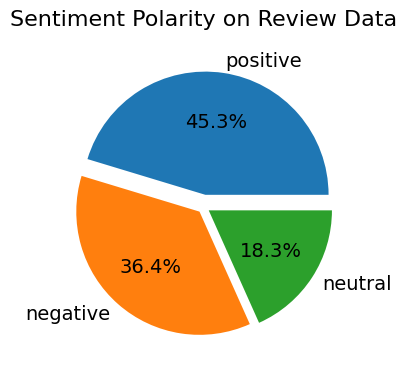

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = (0.1, 0.05, 0.05)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

In [21]:
# Atur tampilan agar kolom bisa menampilkan hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# Filter tweet dengan polaritas positif dan pilih kolom yang diinginkan
positive_tweets = (
    df[df['polarity'] == 'positive']
    .loc[:, ['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
    .sort_values(by='polarity_score', ascending=False)
    .reset_index(drop=True)
)

# Set indeks mulai dari 1
positive_tweets.index += 1

In [22]:
# Atur tampilan agar kolom bisa menampilkan hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

neutral_tweets = (
    df[df['polarity'] == 'neutral']
    .loc[:, ['text_akhir', 'polarity_score', 'polarity', 'text_stopword']] # Default ascending=True
    .head(10)
    .reset_index(drop=True)
)

# Set indeks mulai dari 1
neutral_tweets.index += 1

In [23]:
# Atur tampilan agar kolom bisa menampilkan hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# Ambil 10 tweet dengan polaritas negatif dan skor sentimen terendah
negative_tweets = (
    df[df['polarity'] == 'negative']
    .loc[:, ['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
    .sort_values(by='polarity_score')  # Default ascending=True
    .head(10)
    .reset_index(drop=True)
)

# Set indeks mulai dari 1
negative_tweets.index += 1

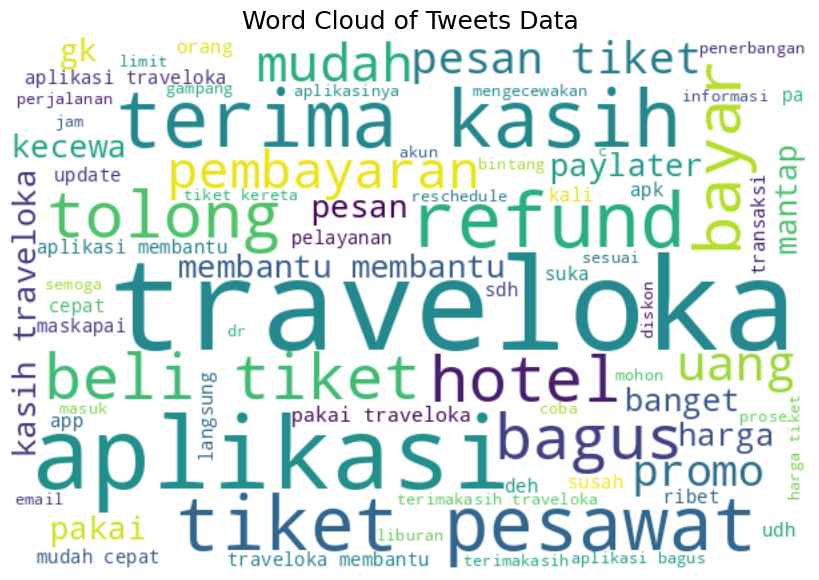

In [24]:
# Gabungkan semua kata dalam kolom 'text_stopword' menjadi satu string
list_words = ' '.join(word for tweet in df['text_stopword'] for word in tweet)

# Buat WordCloud
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10
).generate(list_words)

# Tampilkan WordCloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets Data', fontsize=18)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

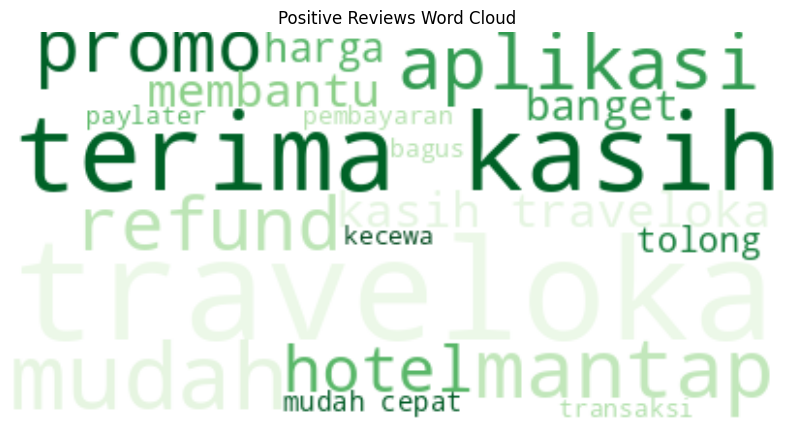

In [25]:
list_words = " ".join(word for review in positive_tweets['text_stopword'] for word in review)

wordcloud = WordCloud(
    max_font_size = 160, 
    margin=0, background_color = "white", 
    min_font_size=10,
    colormap="Greens"
).generate(list_words)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

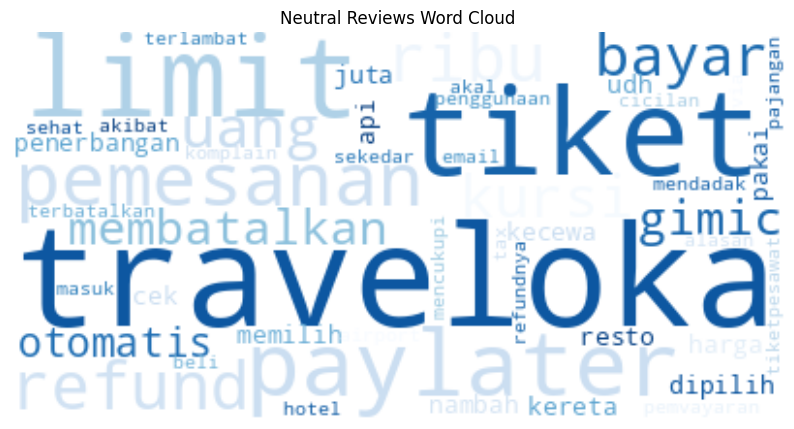

In [26]:
list_words = " ".join(word for review in neutral_tweets['text_stopword'] for word in review)

wordcloud = WordCloud(
    max_font_size = 160, 
    margin=0, background_color = "white", 
    min_font_size=10,
    colormap="Blues"
).generate(list_words)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Neutral Reviews Word Cloud")
plt.show()

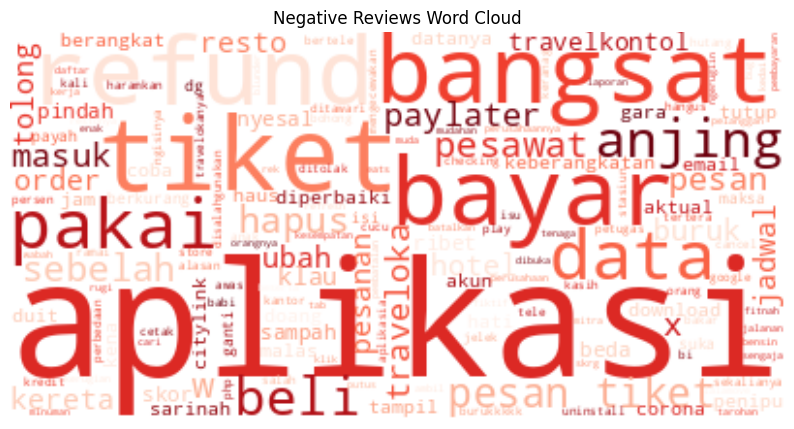

In [27]:
list_words = " ".join(word for review in negative_tweets['text_stopword'] for word in review)

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(list_words)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

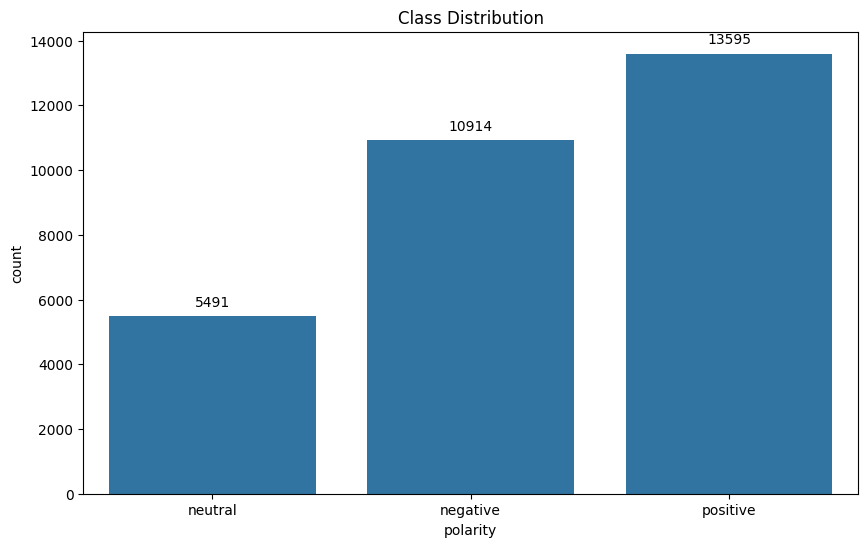

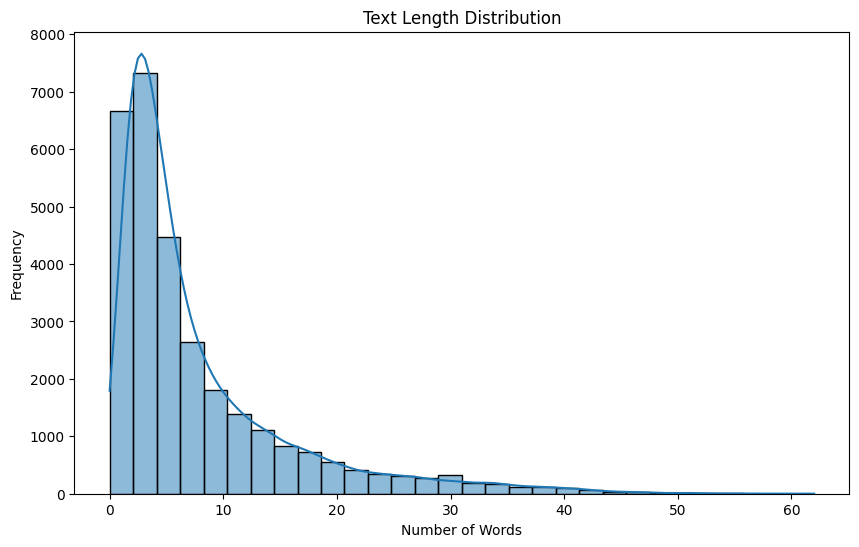

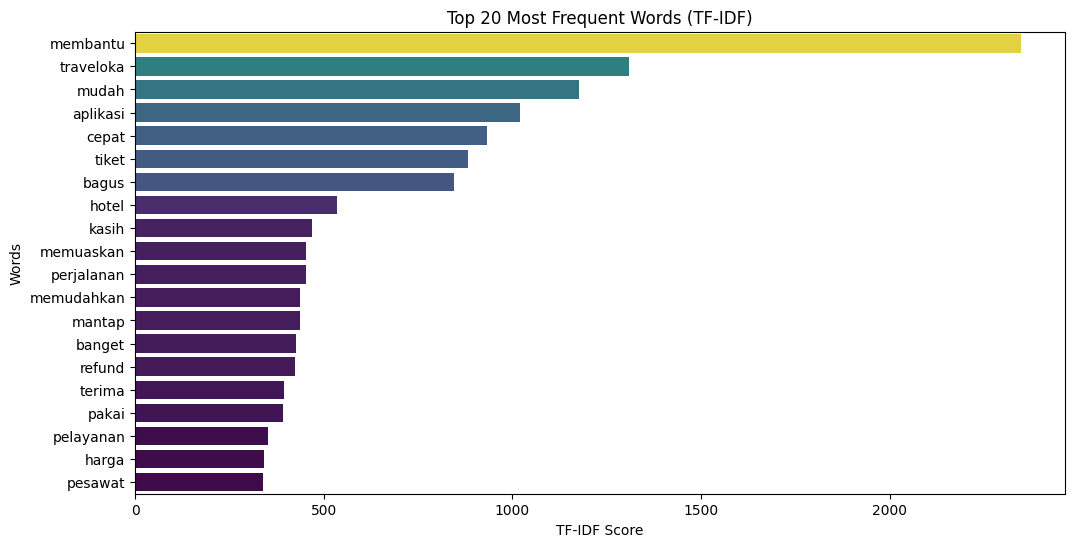

In [28]:
# ===== 1. Class Distribution =====
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='polarity', data=df)
plt.title('Class Distribution')

# Tambahkan nilai jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# ===== 2. Text Length Distribution =====
df['text_length'] = df['text_akhir'].str.split().apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# ===== 3. Most Frequent Words (TF-IDF) =====
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['text_akhir'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
top_words = (
    tfidf_df.sum()
    .sort_values(ascending=False)
    .head(20)
    .reset_index(name='jumlah')
    .rename(columns={'index': 'word'})
)

plt.figure(figsize=(12, 6))
sns.barplot(x='jumlah', y='word', hue='jumlah', legend=False, data=top_words, palette='viridis')
plt.title('Top 20 Most Frequent Words (TF-IDF)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

# Data Splitting

In [29]:
df.head().T

,0,1,2,3,4
appVersion,5.16.0,5.16.0,5.16.0,5.16.0,5.15.1
at,2025-04-03 11:08:22,2025-04-04 08:46:42,2025-03-30 10:33:31,2025-03-30 14:35:46,2025-03-25 09:03:05
content,"Limit paylater traveloka hanya sekedar gimic / pajangan. Pemvayaran cicilan paylater tidak pernah telat, namun penggunaan paylater berikutnya tidak bisa digunakan lagi. Traveloka juga membatalkan pemesanan hotel saya secara mendadak dan juga membatalkan secara sepihak. Saya sudah komplain via email namun tidak diberikan jawaban akibat limit paylater saya tidak mencukupi hingga terbatalkan otomatis. Jawaban sangat tidak masuk akal sehat, limit paylater saya masih cukup besar namun hanya GIMIC.","tidak ada screening untuk tempat tempat yg disewakan,dapet apartemen mati dan terbengkalai saat gambar gambar yg ditampilkan Traveloka bagus/normal tapi asli nya gedung mati.","Aplikasi bagus, namun terkadang tidak jujur, saat akan melakukan pembayaran sering kali akan muncul keterangan ""Harga telah berubah NAIK"" (ALWAYS) 👀. Pengalaman yang terakhir pesan tiket transit yg connecting, tp dirubah sepihak sehingga waktu tidak sesuai dengan alasan dari maskapai, setalah konfirmasi berkali2 disuruh mundur sehari dan saya menyetuju utk mundur sehari dari jadwal awal, tp bbrp hari kemudian jadwal tsb dirubah lagi secara sepihak sama spt sebelumnya. 🥵👹👺","homestay yang kamarnya sudah habis tetap ada di display. untuk pemindahan dana ke hotel yang lainpun dipersulit walaupun dalam komunikasi sangat sopan tetapi sangat sangat slow respon. mungkin saat anda beruntung apk ini membantu, tapi kalau lagi apes ya sabar sabar aja.",semurah apapun promonya saya tidak akan pernah mau memesan apapun dari traveloka yang bekerjasama dengan hotel yang hanya menyediakan satu handuk di setiap kamarnya untuk dipakai bersama. kesehatan lebih utama daripada promo gaeeeeeeessss.....
repliedAt,2025-03-30 18:53:54,2025-04-04 09:17:03,2025-03-30 05:13:09,2025-03-30 15:27:28,2025-01-02 21:22:19
replyContent,"Hai Reza, mohon maaf atas ketidaknyamanannya. Setelah kami cek, Anda sudah terhubung pada nomor laporan 421xxx26 melalui email. Mohon untuk menunggu informasi selanjutnya pada email tersebut dan memastikan masalah tersebut ditangani sepenuhnya. Terima kasih. -BM","Hai Nina, mohon maaf atas kendala yang Anda alami dengan pemesanan Anda. Tim kami sedang berupaya menangani masalah tersebut dengan nomor kasus 42xxx944. Kami akan terus mengabari Anda melalui pesan aplikasi selama proses berlangsung. Terima kasih atas kesabaran Anda. -VA","Hai Ardianto, terima kasih atas masukan Anda mengenai harga kami. Tim kami senantiasa mengevaluasi harga untuk memastikan kami menawarkan harga yang paling kompetitif. Masukan Anda sangat berharga dan kami akan mempertimbangkannya secara internal. Terima kasih telah memilih Traveloka. -AL","Hai Anggraeni, mohon maaf atas kendala yang Anda alami. Setelah melakukan pengecekan, kami menemukan bahwa masalah tersebut telah teratasi pada nomor laporan 42XXXX70. Kami telah mengirimkan email untuk mendiskusikannya lebih lanjut dan memastikan masalah tersebut ditangani sepenuhnya. Terima kasih. -DK","Hai Deni, mohon maaf atas ketidaknyamanan Anda. Tim kami sedang berupaya menangani masalah tersebut dengan nomor kasus terkait 40XXXX10. Kami akan terus mengabari Anda melalui email selama proses berlangsung. Terima kasih atas kesabaran Anda. -AS"
reviewCreatedVersion,5.16.0,5.16.0,5.16.0,5.16.0,5.15.1
reviewId,0725c399-b5a3-485c-b916-f4d87e932510,f5fb97be-08d0-47fe-8420-94f2d85d1e1d,8408ca37-2b90-4c21-8327-7c651654ee1e,7937d32a-7f53-4f06-85d2-afcc15f1c8d0,b8143b57-efb5-4a18-8032-263e8bb76d43
score,1,1,1,1,1
thumbsUpCount,10,1,14,6,29
userImage,https://play-lh.googleusercontent.com/a-/ALV-UjV5ku9e598H1JA0CLR3X1TBceRMQasYjdvGOy1dPYxo1o6Ir7w,https://play-lh.googleusercontent.com/a-/ALV-UjXXiZN389SUZecEtTxfphHXWxZDG0_c4g5Aa49Gzzkqo18fhjah,https://play-lh.googleusercontent.com/a/ACg8ocKYKi-Un4i4g7hVhvDtwF-4Th89I2Gb-lU7nyE8F1J9pC5LmQ=mo,https://play-lh.googleusercontent.com/a-/ALV-UjWq

In [30]:
def prepare_data(X_raw, y_raw, test_size=0.2, random_state=42):
    # Split data sebelum ekstraksi fitur
    X_train, X_test, y_train, y_test = train_test_split(
        X_raw, y_raw, test_size=test_size, random_state=random_state, stratify=y_raw
    )

    # Label encoding
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    # One-hot encoding
    y_train_ohe = to_categorical(y_train_encoded)
    y_test_ohe = to_categorical(y_test_encoded)

    # Simpan encoder
    with open("label_encoder.pkl", "wb") as f:
        pickle.dump(le, f)

    return X_train, X_test, y_train_ohe, y_test_ohe

In [31]:
def preprocess_data(X_train_raw, X_test_raw, method='tfidf'):
    """
    Preprocess teks menggunakan TF-IDF atau Count Vectorizer.

    Returns:
    - X_train, X_test: sparse matrix hasil transformasi
    - vectorizer: objek vectorizer yang digunakan
    """
    vectorizers = {
        'tfidf': (TfidfVectorizer(max_features=500, min_df=15, max_df=0.9), 'vectorizer_tfidf.pkl'),
        'count': (CountVectorizer(max_features=1000, min_df=10, max_df=0.8), 'vectorizer_count.pkl')
    }

    if method not in vectorizers:
        raise ValueError("Method harus 'tfidf' atau 'count'.")

    vectorizer, filename = vectorizers[method]
    X_train = vectorizer.fit_transform(X_train_raw)
    X_test = vectorizer.transform(X_test_raw)

    with open(filename, "wb") as f:
        pickle.dump(vectorizer, f)

    print(f"{filename} berhasil disimpan")
    return X_train, X_test, vectorizer

In [32]:
# 1. Siapkan data mentah
X_train_raw, X_test_raw, y_train_ohe, y_test_ohe = prepare_data(df['text_akhir'], df['polarity'])

# 2. Ekstraksi fitur TF-IDF
X_train_tfidf, X_test_tfidf, tfidf_vectorizer = preprocess_data(
    X_train_raw, X_test_raw, method='tfidf'
)

# 3. Ekstraksi fitur CountVectorizer
X_train_count, X_test_count, count_vectorizer = preprocess_data(
    X_train_raw, X_test_raw, method='count'
)

vectorizer_tfidf.pkl berhasil disimpan
vectorizer_count.pkl berhasil disimpan


# Modelling

### Model 1

In [33]:
# Definisikan arsitektur model dengan penyesuaian pada dropout dan penambahan BatchNormalization tambahan
model = Sequential([
    Input(shape=(X_train_tfidf.shape[1],)),
    Dense(1024, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.5), # Nilai dropout diturunkan dari 0.6 ke 0.5
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.4), # Nilai dropout diturunkan dari 0.5 ke 0.4
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(), # Menambahkan normalisasi agar distribusi data lebih stabil
    Dropout(0.3), # Tambahan dropout untuk layer ini guna mengurangi overfitting
    Dense(3, activation='softmax')
])

# Kompilasi model dengan optimizer Adam dan learning rate awal 0.001
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback untuk menghentikan training secara dini jika metrik validasi tidak membaik
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Callback untuk menyimpan model terbaik berdasarkan validasi
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Callback untuk mengurangi learning rate jika validasi tidak meningkat
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, min_lr=1e-6)

# Training model dengan peningkatan jumlah epoch (dengan early stopping)
history = model.fit(
    X_train_tfidf.toarray(), y_train_ohe,
    validation_data=(X_test_tfidf.toarray(), y_test_ohe),
    epochs=30, # Epoch ditingkatkan agar model memiliki kesempatan belajar lebih lama
    batch_size=64,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

Epoch 1/30
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6778 - loss: 0.8761
Epoch 1: val_accuracy improved from -inf to 0.71783, saving model to best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.6781 - loss: 0.8750 - val_accuracy: 0.7178 - val_loss: 0.6510 - learning_rate: 0.0010
Epoch 2/30
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8425 - loss: 0.4344
Epoch 2: val_accuracy improved from 0.71783 to 0.87433, saving model to best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8425 - loss: 0.4343 - val_accuracy: 0.8743 - val_loss: 0.3717 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8719 - loss: 0.3727
Epoch 3: val_accuracy improved from 0.87433 to 0.88117, saving model to best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8719 - loss: 0.3727 - val_accuracy: 0.8812 - val_loss: 0.3600 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 20m

### Model 2

In [34]:
# Definisikan arsitektur model dengan penyesuaian pada dropout dan penambahan BatchNormalization tambahan
model2 = Sequential([
    Input(shape=(X_train_count.shape[1],)),
    Dense(1024, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.5), # Nilai dropout diturunkan dari 0.6 ke 0.5
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.4), # Nilai dropout diturunkan dari 0.5 ke 0.4
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(), # Menambahkan normalisasi agar distribusi data lebih stabil
    Dropout(0.3), # Tambahan dropout untuk layer ini guna mengurangi overfitting
    Dense(3, activation='softmax')
])

# Kompilasi model dengan optimizer Adam dan learning rate awal 0.001
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback untuk menghentikan training secara dini jika metrik validasi tidak membaik
early_stop2 = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Callback untuk menyimpan model terbaik berdasarkan validasi
checkpoint2 = ModelCheckpoint('best_model2.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Callback untuk mengurangi learning rate jika validasi tidak meningkat
reduce_lr2 = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, min_lr=1e-6)

# Training model dengan peningkatan jumlah epoch (dengan early stopping)
history2 = model2.fit(
    X_train_count.toarray(), y_train_ohe,
    validation_data=(X_test_count.toarray(), y_test_ohe),
    epochs=30, # Epoch ditingkatkan agar model memiliki kesempatan belajar lebih lama
    batch_size=64,
    callbacks=[early_stop2, checkpoint2, reduce_lr2]
)

Epoch 1/30
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6731 - loss: 0.9033
Epoch 1: val_accuracy improved from -inf to 0.82567, saving model to best_model2.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.6735 - loss: 0.9021 - val_accuracy: 0.8257 - val_loss: 0.4589 - learning_rate: 0.0010
Epoch 2/30
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8679 - loss: 0.3737
Epoch 2: val_accuracy improved from 0.82567 to 0.90117, saving model to best_model2.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8680 - loss: 0.3737 - val_accuracy: 0.9012 - val_loss: 0.2955 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9011 - loss: 0.2903
Epoch 3: val_accuracy improved from 0.90117 to 0.90733, saving model to best_model2.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9010 - loss: 0.2903 - val_accuracy: 0.9073 - val_loss: 0.2868 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 

### Model 3

In [35]:
def build_residual_model(input_dim, num_classes=3):
    inputs = Input(shape=(input_dim,))

    # Initial Dense Layer
    x = Dense(512, kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual Block
    shortcut = x  # Simpan input untuk skip connection
    x = Dense(512, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)
    x = Add()([shortcut, x])  # Skip connection
    x = Activation('relu')(x)

    # Additional Layer
    x = Dense(256, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [36]:
model3 = build_residual_model(input_dim=X_train_tfidf.shape[1], num_classes=y_train_ohe.shape[1])

model3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model3.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, min_lr=1e-6)
]

# Training
history3 = model3.fit(
    X_train_tfidf.toarray(), y_train_ohe,
    validation_data=(X_test_tfidf.toarray(), y_test_ohe),
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7422 - loss: 0.6672
Epoch 1: val_accuracy improved from -inf to 0.82967, saving model to best_model3.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7427 - loss: 0.6661 - val_accuracy: 0.8297 - val_loss: 0.5247 - learning_rate: 0.0010
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8833 - loss: 0.3400
Epoch 2: val_accuracy improved from 0.82967 to 0.87683, saving model to best_model3.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8832 - loss: 0.3400 - val_accuracy: 0.8768 - val_loss: 0.3591 - learning_rate: 0.0010
Epoch 3/30
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9064 - loss: 0.2817
Epoch 3: val_accuracy did not improve from 0.87683
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9064 - loss: 0.2817 - val_accuracy: 0.8767 - val_loss: 0.3749 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9164 - loss: 0.25

# Testing

In [37]:
def predict_sentiment(text, model_type='tfidf_simple'):
    """
    Memprediksi sentimen dari input teks berdasarkan model yang dipilih.

    Parameter:
    - text (str): Kalimat atau teks input.
    - model_type (str): Jenis model, pilih salah satu dari:
        'tfidf_simple', 'count_simple', 'tfidf_residual'

    Output:
    - predicted_class (str): Sentimen hasil prediksi (negatif, netral, positif)
    - probabilities (dict): Probabilitas tiap kelas
    """
    import numpy as np
    import pickle
    from tensorflow.keras.models import load_model

    # === 1. Load vectorizer dan model ===
    vec_map = {
        'tfidf_simple': ('vectorizer_tfidf.pkl', 'best_model.keras'),
        'count_simple': ('vectorizer_count.pkl', 'best_model2.keras'),
        'tfidf_residual': ('vectorizer_tfidf.pkl', 'best_model3.keras')
    }

    if model_type not in vec_map:
        raise ValueError(f"Model '{model_type}' tidak tersedia. Pilih: {list(vec_map.keys())}")

    vectorizer_path, model_path = vec_map[model_type]

    with open(vectorizer_path, 'rb') as f:
        vectorizer = pickle.load(f)

    model = load_model(model_path)

    # === 2. Load LabelEncoder ===
    with open('label_encoder.pkl', 'rb') as f:
        le = pickle.load(f)

    # === 3. Preprocessing input text ===
    text_vec = vectorizer.transform([text]).toarray()

    # === 4. Predict ===
    prediction = model.predict(text_vec)
    predicted_idx = np.argmax(prediction, axis=1)
    predicted_class = le.inverse_transform(predicted_idx)[0]

    # === 5. Format hasil ===
    class_probs = {cls: float(prob) for cls, prob in zip(le.classes_, prediction[0])}

    return predicted_class, class_probs

In [39]:
import random

sample_texts = [
    "Desain antarmuka sangat intuitif, saya jadi lebih mudah menggunakannya.",
    "Sayangnya aplikasi sering crash setelah update terakhir.",
    "Fitur-fiturnya cukup lengkap, tapi performa masih perlu ditingkatkan.",
]

model_types = ['tfidf_simple', 'count_simple', 'tfidf_residual']

random.shuffle(sample_texts)

for idx, text in enumerate(sample_texts, 1):
    print(f"\nText #{idx}: {text}")
    print("-" * 100)
    
    for model in model_types:
        label, prob = predict_sentiment(text, model_type=model)
        prob_fmt = ', '.join([f"{k}: {v:.3f}" for k, v in prob.items()])
        print(f"[{model}] → Predicted: {label.upper():<8} | Probabilities → {prob_fmt}")


Text #1: Desain antarmuka sangat intuitif, saya jadi lebih mudah menggunakannya.
----------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
[tfidf_simple] → Predicted: POSITIVE | Probabilities → negative: 0.000, neutral: 0.000, positive: 0.999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
[count_simple] → Predicted: POSITIVE | Probabilities → negative: 0.000, neutral: 0.002, positive: 0.998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
[tfidf_residual] → Predicted: POSITIVE | Probabilities → negative: 0.000, neutral: 0.000, positive: 1.000

Text #2: Fitur-fiturnya cukup lengkap, tapi performa masih perlu ditingkatkan.
----------------------------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
[tfidf_simple] → Predicted: NEUTRAL  | Probabilities → negative: 0.343, neutral: 0.588, positive: 0.068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[count_simple] → Predic